# Bayes and EM
## In this exercise you will perform the following:
1. Implement EM algorithm.
1. Implement Naive Bayes algorithm that uses EM for calculating the likelihood.
1. Visualize your results.

In [1]:
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Function for ploting the decision boundaries of a model
# You will use it later
def plot_decision_regions(X, y, classifier, resolution=0.01):

    # setup marker generator and color map
    markers = ('.', '.')
    colors = ('blue', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.to_numpy()
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

In [3]:
def plot_decision_regions1(X, y, classifier, resolution=0.01):

    # setup marker generator and color map
    markers = ('.', '.')
    colors = ('blue', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

## Reading the data

In [4]:
training_set = pd.read_csv('training_set.csv')
test_set = pd.read_csv('test_set.csv')
X_training, y_training = training_set[['x1', 'x2']].values, training_set['y'].values
X_test, y_test = test_set[['x1', 'x2']].values, test_set['y'].values

## Visualizing the data ( 10 points)

Plot the following graphs for the training set:

For the first feature only:
1. For the first 1000 data points plot a histogram for each class on the same graph (use bins=20, alpha=0.5).
1. For all the data points plot a histogram for each class on the same graph (use bins=40, alpha=0.5).

For both features:
1. For the first 1000 data points plot a scatter plot where each class has different color
1. For all the data points plot a scatter plot where each class has different color

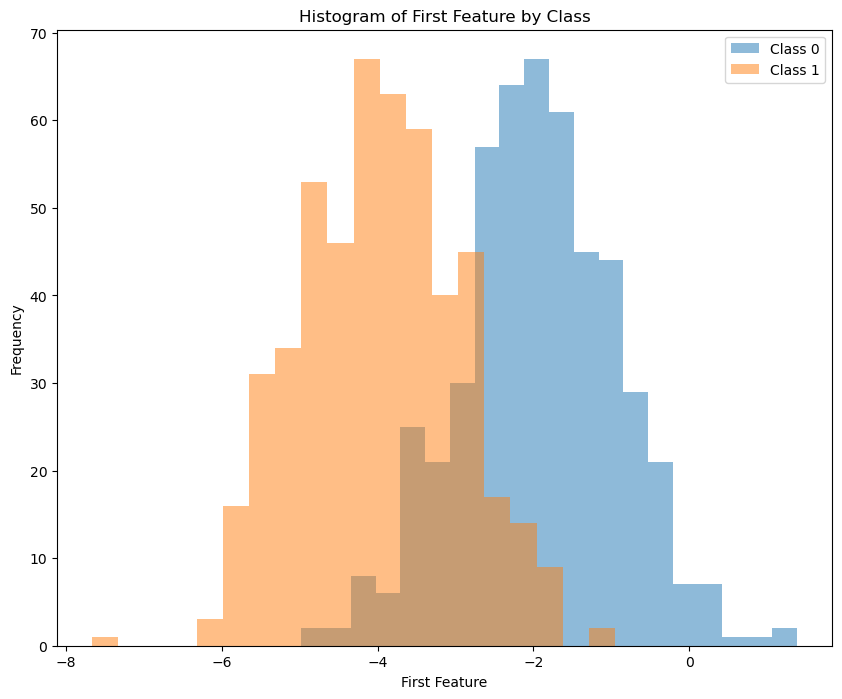

In [5]:
# Extract the first feature and class columns
first_feature = training_set.iloc[:1000, 0]
class_labels = training_set.iloc[:1000, -1]

# Create separate dataframes for each class
class_0 = first_feature[class_labels == 0]
class_1 = first_feature[class_labels == 1]

# Plotting the histograms
plt.hist(class_0, bins=20, alpha=0.5, label='Class 0')
plt.hist(class_1, bins=20, alpha=0.5, label='Class 1')

# Add labels and title to the plot
plt.xlabel('First Feature')
plt.ylabel('Frequency')
plt.title('Histogram of First Feature by Class')

# Add legend
plt.legend()

# Display the plot
plt.show()

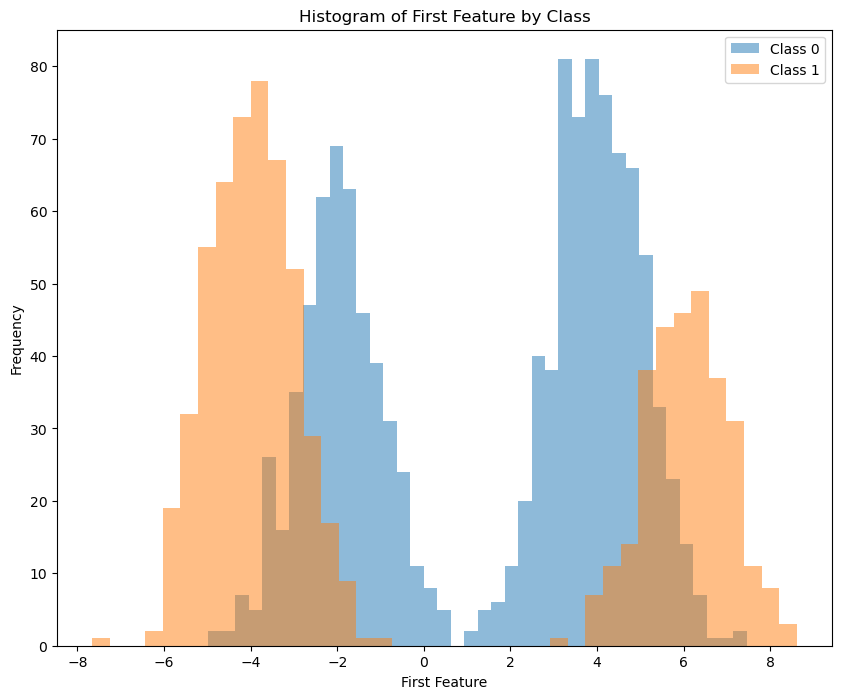

In [6]:
# Extract the first feature and class columns
first_feature = training_set.iloc[:, 0]
class_labels = training_set.iloc[:, -1]

# Create separate dataframes for each class
class_0 = first_feature[class_labels == 0]
class_1 = first_feature[class_labels == 1]

# Plotting the histograms
plt.hist(class_0, bins=40, alpha=0.5, label='Class 0')
plt.hist(class_1, bins=40, alpha=0.5, label='Class 1')

# Add labels and title to the plot
plt.xlabel('First Feature')
plt.ylabel('Frequency')
plt.title('Histogram of First Feature by Class')

# Add legend
plt.legend()

# Display the plot
plt.show()

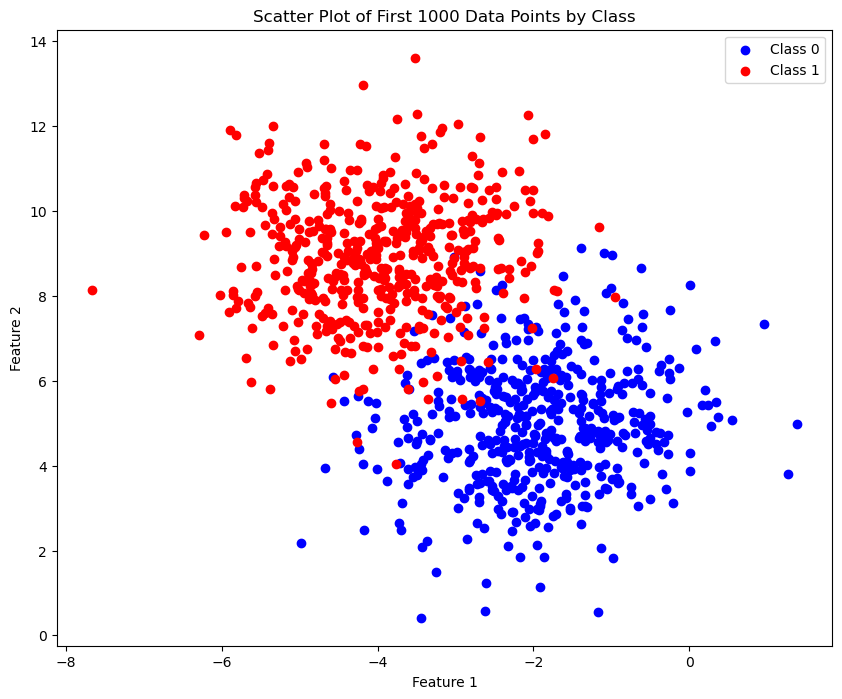

In [7]:
# Extract the first two features and class columns
features = training_set.iloc[:1000, :2]
class_labels = training_set.iloc[:1000, -1]

# Create separate dataframes for each class
class_0 = features[class_labels == 0]
class_1 = features[class_labels == 1]

# Plotting the scatter plot
plt.scatter(class_0.iloc[:, 0], class_0.iloc[:, 1], c='blue', label='Class 0')
plt.scatter(class_1.iloc[:, 0], class_1.iloc[:, 1], c='red', label='Class 1')

# Add labels and title to the plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of First 1000 Data Points by Class')

# Add legend
plt.legend()

# Display the plot
plt.show()


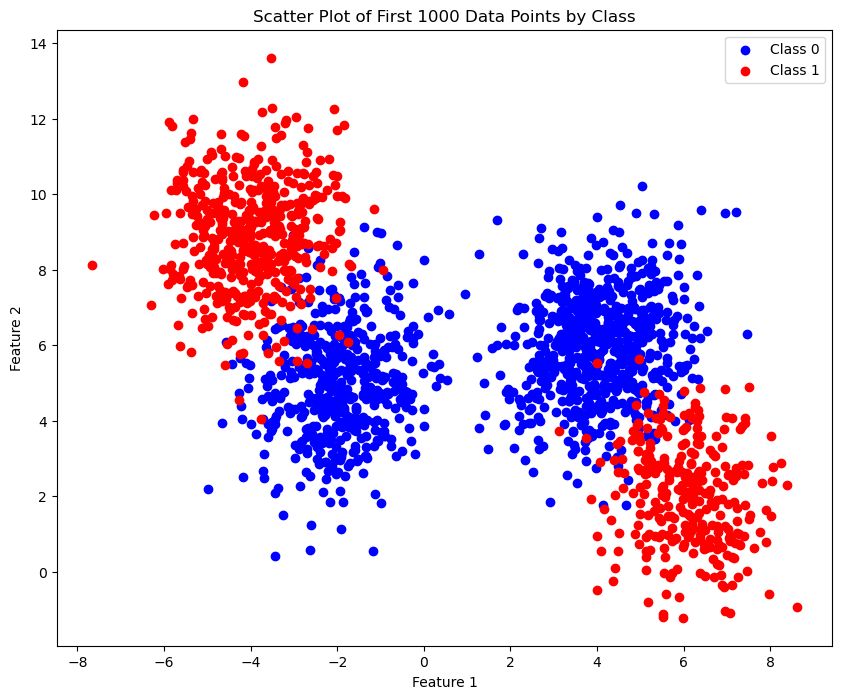

In [8]:
# Extract the first two features and class columns
features = training_set.iloc[:, :2]
class_labels = training_set.iloc[:, -1]

# Create separate dataframes for each class
class_0 = features[class_labels == 0]
class_1 = features[class_labels == 1]

# Plotting the scatter plot
plt.scatter(class_0.iloc[:, 0], class_0.iloc[:, 1], c='blue', label='Class 0')
plt.scatter(class_1.iloc[:, 0], class_1.iloc[:, 1], c='red', label='Class 1')

# Add labels and title to the plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of First 1000 Data Points by Class')

# Add legend
plt.legend()

# Display the plot
plt.show()


## Normal distribution pdf (10 Points)

Implement the normal distribution pdf 
$$
f(x;\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\big{(}\frac{x-\mu}{\sigma}\big{)}^2}
$$
Write efficient vectorized code

In [9]:
#### Your code here ####
# calc normal pdf    
def norm_pdf(data, mu, sigma):
    pdf = (1/(sigma*(2*np.pi)**0.5))*np.exp(-0.5*((data-mu)/sigma)**2)
    return pdf
    

## Expectation Maximization (30 Points)

Implement the Expectation Maximization algorithm for gaussian mixture model.

The class should hold the distribution params.

Use negative log likelihood as the cost function:
$$
cost(x) = \sum_{i=1}^{m}-log\bigg(\sum_{j=1}^{k}w_j * pdf(x_i; \mu_j, \sigma_j)\bigg)
$$

\* Where i is the index of the instances (from 1 to m) and j is the index of the gaussian in the GMM (from 1 to k). 

Your class should contain the following functions:
1. init_params - initialize distribution params
1. expectation - calculating responsibilities
1. maximization - updating distribution params
1. fit - the learning function (this function calls the init_params and then iteratively calls expectation and maximization)
1. get_dist_params - return the params of the distribution (the GMM distribution) 

\* You can add more functions if you think this is necessary

Don't change the eps params (eps=0.01)

When you need to calculate the pdf of a normal distribution use the function `norm_pdf` that you implemented above.

In [10]:
class EM(object):
    """
    Naive Bayes Classifier using Gauusian Mixture Model (EM) for calculating the likelihood.

    Parameters
    ------------
    k : int
      Number of gaussians in each dimension
    n_iter : int
      Passes over the training dataset in the EM proccess
    eps: float
      minimal change in the cost to declare convergence
    random_state : int
      Random number generator seed for random params initialization.
    """
    
    def __init__(self, k=1, n_iter=1000, eps=0.01):
        self.k = k
        self.n_iter = n_iter
        self.eps = eps

    # initial guesses for parameters
    def init_params(self, data):
        """
        Initialize distribution params
        """
        self.ws = np.full(self.k, 1.0 / self.k)
        self.mus = []
        self.sigmas = []
        # Guess mu as center of K quantiles
        quat_data, bins = pd.qcut(data, self.k, retbins=True, labels=False)
        self.mus = (bins[:-1] + bins[1:]) / 2
        # Guess sigma as empiric sigma
        self.sigmas = np.array([np.sqrt(np.mean((data[quat_data == k] - self.mus[k]) ** 2)) for k in range(self.k)])

    def expectation(self, data):
        """
        E step - calculating responsibilities
        """
        responsibilities = np.zeros((len(data), self.k))
        for i in range(self.k):
            responsibilities[:,i] = self.ws[i] * norm_pdf(data, self.mus[i], self.sigmas[i]) # can be done vectorized
        sum_rows = np.sum(responsibilities , axis = 1)
        responsibilities = responsibilities / sum_rows.reshape(-1,1)
        
        return responsibilities
        

    def maximization(self, data):
        """
        M step - updating distribution params
        """
        responsibilities = self.expectation(data)
        sum_res = np.sum(responsibilities, axis=0)
        
        self.ws = sum_res / len(data)
        self.mus = np.sum(responsibilities * data.reshape(len(data),1), axis=0) / sum_res
        self.sigmas = np.sqrt(np.sum(responsibilities * (data.reshape(len(data),1) - self.mus)**2, axis=0) / sum_res)

    def fit(self, data):
        """ 
        Fit training data (the learning phase).
        Use init_params and then expectation and maximization function in order to find params 
        for the distribution. 
        Store the params in attributes of the EM object.
        Stop the function when the difference between the previous cost and the current is less than eps
        or when you reach n_iter.
        """
        self.init_params(data)
        
        last = np.inf
        
        for i in range(self.n_iter):
            cost = 0
            
            for k in range(self.k):
                cost += np.sum( -np.log(self.ws[k]*norm_pdf(data, self.mus[k], self.sigmas[k])) ,axis=0)
                
            if abs(cost - last) < self.eps:
                break
                
            last = cost
            self.maximization(data)
            

    def get_dist_params(self):
        return self.ws, self.mus, self.sigmas
    

## Naive Bayes (30 Points)

Implement the Naive Bayes algorithm.

For calculating the likelihood use the EM algorithm that you implemented above to find the distribution params. With these params you can calculate the likelihood probability.

Calculate the prior probability directly from the training set.

Your class should contain the following functions:
1. fit - the learning function
1. predict - the function for predicting an instance (or instances) after the fit function was executed

\* You can add more functions if you think this is necessary


In [11]:
class NaiveBayesGaussian(object):
    """
    Naive Bayes Classifier using Gauusian Mixture Model (EM) for calculating the likelihood.

    Parameters
    ------------
    k : int
      Number of gaussians in each dimension
    random_state : int
      Random number generator seed for random params initialization.
    """
    
    def __init__(self, k=1):
        self.k = k
        self.class_p = []
        self.priors = []
        self.classes = None

    def fit(self, X, y):
        """ 
        Fit training data.

        Parameters
        ----------
        X : array-like, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.
        """
        self.classes = len(np.unique(y))
        for c in np.unique(y):
            X_c = X[y == c]
            c_prior = len(X_c)/len(X)
            self.priors.append(c_prior)
            features = []
            for feat in range(X.shape[1]):
                em = EM(self.k)
                
                em.fit(X_c[:,feat])
                
                dist = em.get_dist_params()
                features.append(dist)
                
            self.class_p.append(features)

            
    def predict(self, X):
        """Return the predicted class label"""
        
        post_class = pd.DataFrame(index=np.arange(X.shape[0]), columns=range(self.classes))
        prob_feat = pd.DataFrame(index=np.arange(X.shape[0]), columns=np.arange(X.shape[1]))
        for c in range(self.classes):
            for feat in range(X.shape[1]):
                w, mu, sigma = self.class_p[c][feat]
                prob = np.sum (w * norm.pdf(X[:,feat].reshape(-1,1),mu,sigma), axis=1 )
                prob_feat.loc[:,feat] = prob
            likelihood = np.prod(prob_feat, axis = 1)  
            posterior = likelihood * self.priors[c]
            post_class.loc[:,c] = posterior
            
        return post_class.idxmax(axis=1)


## Model evaluation (10 points)

1. Use the first 1000 points from the training set (take the first original 1000 points - before the shuffle) and the first 500 points from the test set.
1. Fit the Naive Bayes model. Remember that you need to select the number of Gaussians in the EM.
1. Print the training and test accuracies for the model.
1. Use the `plot_decision_regions` function to plot the decision boundaries for the model (for this you need to use the training set as the input)

Use all the training set points:
1. Repeat sections 2-4 for all the training set points

In [12]:
from sklearn.metrics import accuracy_score


In [13]:
nb = NaiveBayesGaussian(k=2)
nb.fit(X_training[:1000], y_training[:1000])
y_pred = nb.predict(X_training[:1000])

Accuracy = accuracy_score(y_training[:1000], y_pred)
print("Training Accuracy:", Accuracy)

y_pred = nb.predict(X_test[:500])
Accuracy= accuracy_score(y_test[:500], y_pred)
print("Test Accuracy:", Accuracy)

Training Accuracy: 0.969
Test Accuracy: 0.942


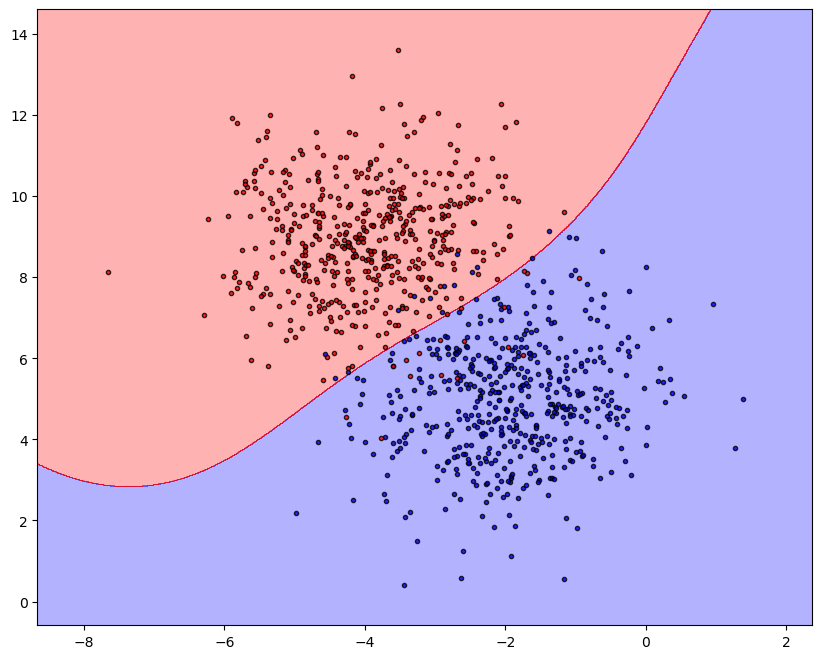

In [14]:
plot_decision_regions(X_training[:1000], y_training[:1000], nb, resolution=0.01)

**all the data:**

In [15]:
nb = NaiveBayesGaussian(k=2)
nb.fit(X_training, y_training)

y_pred = nb.predict(X_training)
Accuracy = accuracy_score(y_training, y_pred)
print("Training Accuracy:", Accuracy)

y_pred = nb.predict(X_test)
Accuracy= accuracy_score(y_test, y_pred)
print("Test Accuracy:", Accuracy)

Training Accuracy: 0.9215
Test Accuracy: 0.902


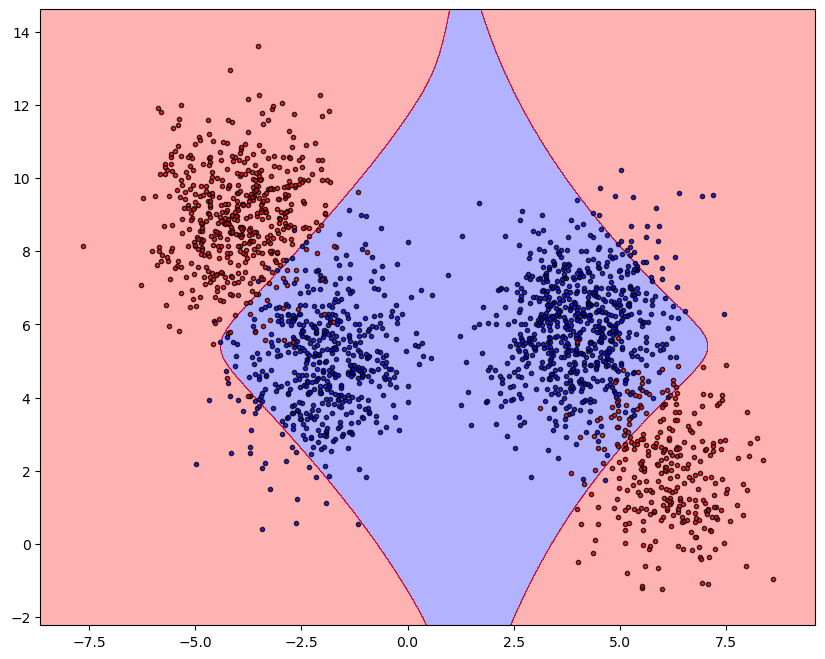

In [16]:
plot_decision_regions(X_training, y_training, nb)

## Open question (10 points) 

In the previous course we implemented the Logistic regression algorithm and we have now completed the implementation of Naive Bayes using EM. 

- Generate one dataset that you think Naive Bayes will work better than Logistic Regression.
- Generate another dataset that you think Logistic Regression will work better than Naive Bayes using EM.
- Explain the reasoning behind each dataset.  

(The number of features and instances is up to you, but use only 2 classes)

2. Visualize the datasets like in the beginning of this notebook.

In [17]:
# You are provided with the Logistic regression class if you need it

class LogisticRegressionGD(object):
    """
    Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    eps : float
      minimal change in the cost to declare convergence
    random_state : int
      Random number generator seed for random weight
      initialization.
    """
    
    def __init__(self, eta=0.00005, n_iter=10000, eps=0.000001, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.eps = eps
        self.random_state = random_state

    def fit(self, X, y):
        """ 
        Fit training data (the learning phase).
        Updating the theta vector in each iteration using gradient descent.
        Store the theta vector in an attribute of the LogisticRegressionGD object.
        Stop the function when the difference between the previous cost and the current is less than eps
        or when you reach n_iter.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        """
        rgen = np.random.RandomState(self.random_state)
        self.theta = np.random.normal(loc=0.0, scale=1, size=1 + X.shape[1])
        self.cost = []
        old_cost = 0
        output = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (output - y)
            self.theta[1:] -= self.eta * X.T.dot(errors)
            self.theta[0] -= self.eta * errors.sum()
            # note that we compute the logistic `cost` now
            # instead of the sum of squared errors cost
            cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))).sum() / X.shape[0]
            if abs(cost - old_cost) < self.eps:
                break
            old_cost = cost
            self.cost.append(cost)
    
    def predict(self, X):
        """Return the predicted class label"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.theta[1:]) + self.theta[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))


#### Your answer here: ####
Naive Bayes is particularly suitable when the data cannot be effectively separated by a linear boundary. This is because Naive Bayes calculates probabilities based on distributions, allowing it to capture complex patterns and dependencies in the data. On the other hand, Logistic Regression relies on a linear decision boundary, which may not be able to accurately capture non-linear relationships present in the data.

To create a dataset **where logistic regression performs better than Naive Bayes with EM**, we need data that can be separated well using a straight line. As we say before logistic regression excels in such cases by finding an optimal linear boundary for classification. Naive Bayes with EM assumes feature independence and may struggle to capture non-linear relationships or complex dependencies in the data.

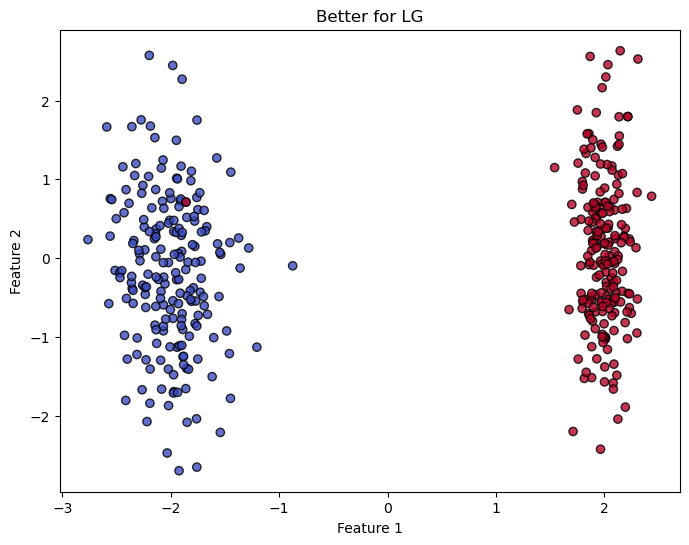

In [18]:
X, y = make_classification(n_samples=500, n_features=2, n_informative=1, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.5, 0.5], random_state=42, class_sep=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', alpha=0.8, edgecolor='k')
plt.title('Better for LG')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


**Fitting the models**

Training Accuracy: 0.78
Test Accuracy: 0.76


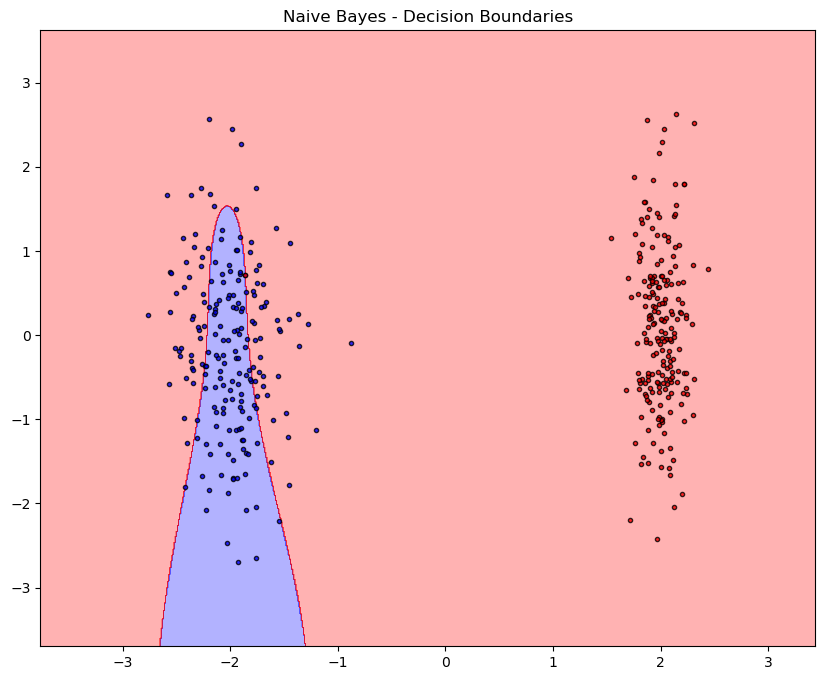

Training Accuracy: 0.9975
Test Accuracy: 1.0


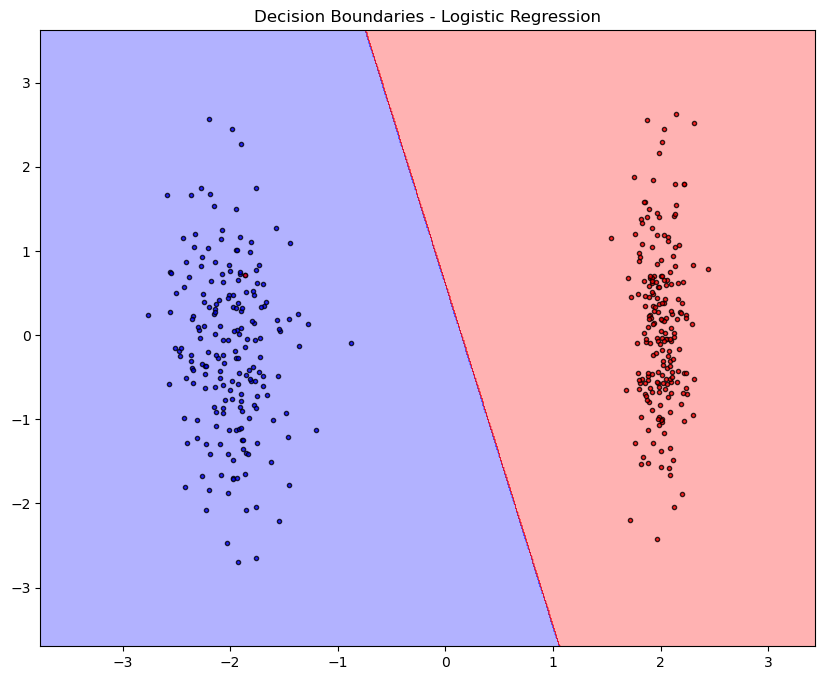

In [19]:
# Fit the Naive Bayes model
nb_model = NaiveBayesGaussian(k=2)
nb_model.fit(X_train, y_train)
y_train_pred = nb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)
y_test_pred = nb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)
plot_decision_regions(X_train, y_train, nb_model)
plt.title("Naive Bayes - Decision Boundaries")
plt.show()

# Fit the Logistic regression model
logistic_regression_model = LogisticRegressionGD()
logistic_regression_model.fit(X_train, y_train)

y_train_pred = logistic_regression_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

y_test_pred = logistic_regression_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

plot_decision_regions1(X_train, y_train, logistic_regression_model)
plt.title("Decision Boundaries - Logistic Regression")
plt.show()


In summary, when dealing with data that can be separated well using a straight line, logistic regression excels by finding an optimal linear boundary for classification. Naive Bayes with its assumption of feature independence may struggle to capture non-linear patterns or intricate relationships in the data.
Therefore for the data set we created of the columns the logistic regression performed better.

To generate a dataset **where Naive Bayes is expected to perform better than Logistic Regression**, we can create a scenario where the data follows a circular pattern. Naive Bayes can potentially capture the class separation based on the independent feature probabilities, while Logistic Regression, which assumes a linear decision boundary, may struggle to fit the circular shape accurately.

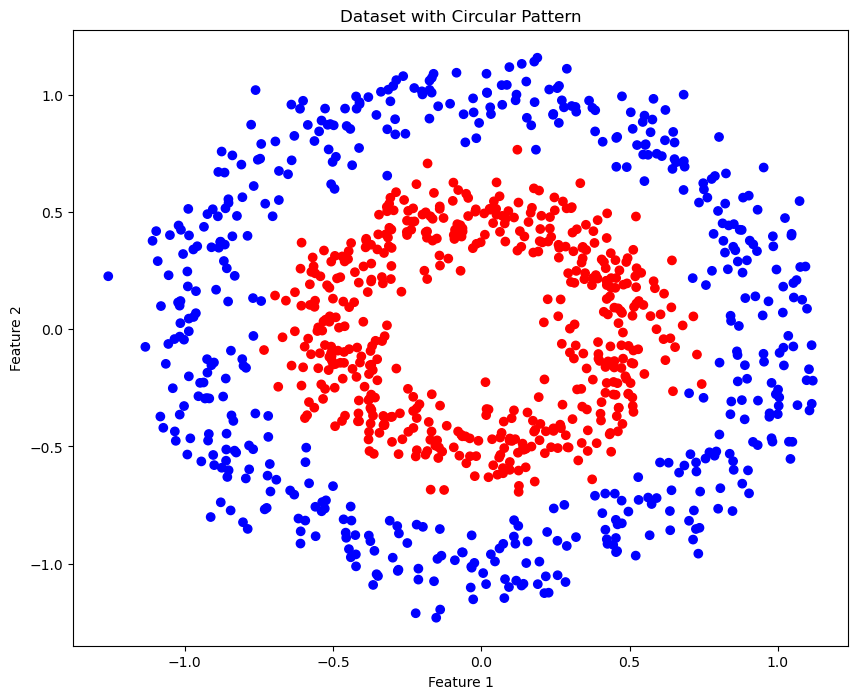

In [20]:
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.title("Dataset with Circular Pattern")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

**fitting the models**

Training Accuracy: 0.985
Test Accuracy: 0.955


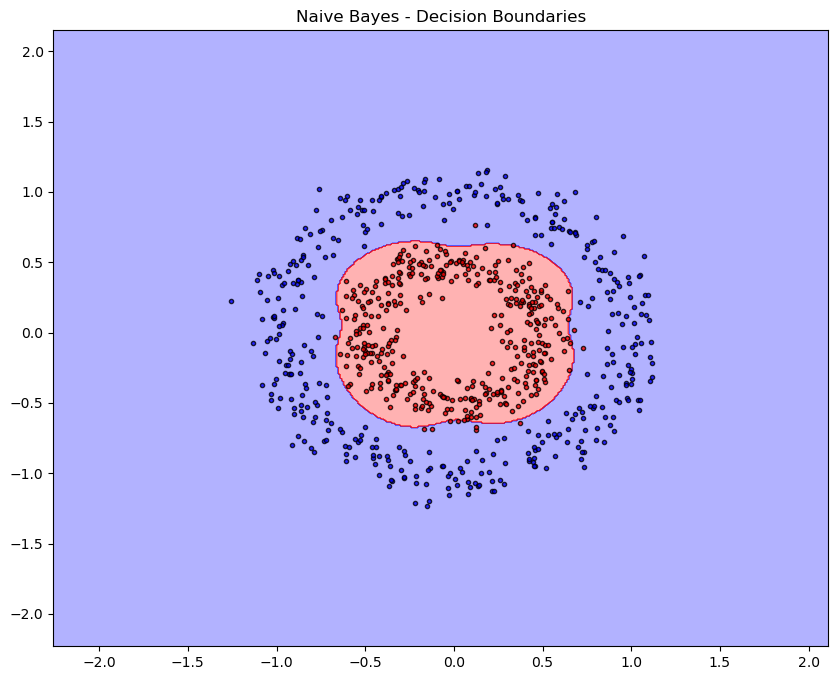

Training Accuracy: 0.51
Test Accuracy: 0.525


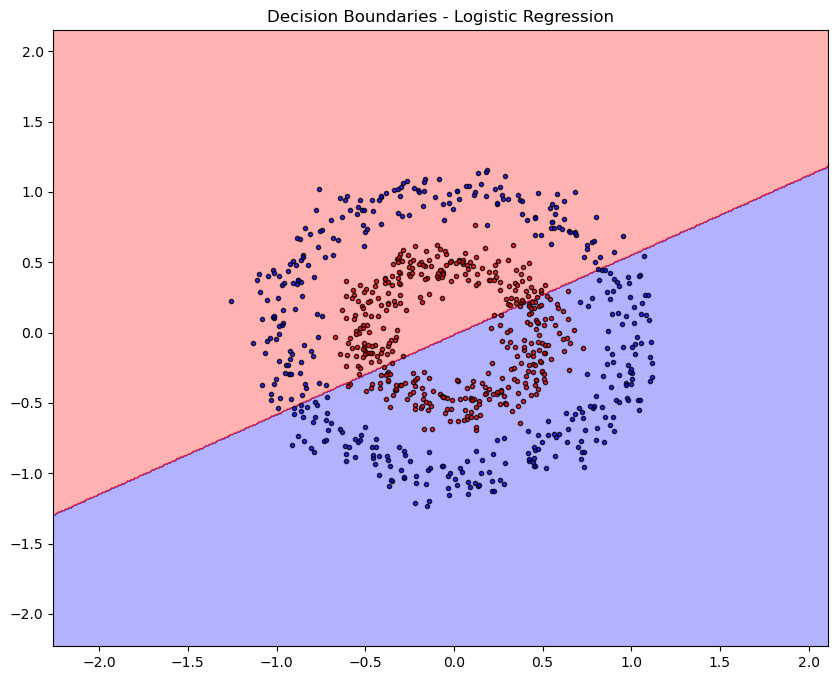

In [21]:
# Fit the Naive Bayes model
nb_model = NaiveBayesGaussian(k=2)
nb = NaiveBayesGaussian(k=2)
nb.fit(X,y)
nb_model.fit(X_train, y_train)
y_train_pred = nb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)
y_test_pred = nb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)
plot_decision_regions(X_train, y_train, nb_model)
plt.title("Naive Bayes - Decision Boundaries")
plt.show()

# Fit the Logistic regression model
logistic_regression_model = LogisticRegressionGD()
logistic_regression_model.fit(X_train, y_train)

y_train_pred = logistic_regression_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

y_test_pred = logistic_regression_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

plot_decision_regions1(X_train, y_train, logistic_regression_model)
plt.title("Decision Boundaries - Logistic Regression")
plt.show()


In datasets where the classes are split in a non-linear manner, such as in a circular pattern, the EM model (Naive Bayes with EM) is expected to outperform logistic regression. The EM model is designed to handle non-linear separation more effectively, capturing complex dependencies in the data. In contrast, logistic regression assumes a linear decision boundary and may struggle to accurately classify data points that exhibit non-linear relationships or intricate patterns.